<a href="https://colab.research.google.com/github/Vivek-23-Titan/Signature-Replication-using-Generative-Adversarial-Networks/blob/master/Multi_Label_Signatures_CGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Import Libraries**##

In [ ]:
import tensorflow as tf
print(tf.__version__)

from keras.models import Sequential, Model
from keras.layers import Input, Dense, LeakyReLU, BatchNormalization, ReLU, Dropout
from keras.layers import Conv2D, Conv2DTranspose, Reshape, Flatten, Activation, ZeroPadding2D, UpSampling2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras import initializers
from keras.utils import plot_model, np_utils
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image

from __future__ import print_function, division

from keras.layers.advanced_activations import LeakyReLU
from keras.layers import BatchNormalization, Dropout
from keras.layers.merge import concatenate
from keras.utils import to_categorical, plot_model
import keras

import matplotlib.cm as cm
from sklearn import metrics
import seaborn as sns
from PIL import Image

import imageio
from skimage import img_as_ubyte
import os

2.3.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


##**Prepare CGAN Training Data**##

In [ ]:
%cd /content/drive/My Drive/My Segmented Signatures
%ls
!cp ./My_Segmented_Signatures.zip /content/

/content/drive/My Drive/My Segmented Signatures
 amit/                    'My Segmented Signatures'/      Segmented/
 aswal/                    My_Segmented_Signatures.zip    Signatures/
 daniel/                   My_signatures/                 vinod/
 Gen_Signatures_3000.zip   My_signatures_1000.zip         vivek/
 john/                     New_Generated_Signatures.zip   X_test/
 kevin/                    New_Gen_Signatures_5000.zip    X_train/
 lalita/                   ram/
 Models/                   sancho/


In [ ]:
%cd /content/

from zipfile import ZipFile
with ZipFile('/content/My_Segmented_Signatures.zip', 'r') as zip:
  zip.extractall()
  print("Done")

/content
Done


In [ ]:
import glob
import cv2
import PIL
from PIL import ImageOps

path = glob.glob(r"/content/My Segmented Signatures/amit/*.PNG")
X_train1 = []
Y_train1 = []
dim = (64,64) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train1.append(im_bw)
    Y_train1.append([0])

Y_train1 = np.array(Y_train1)

In [ ]:
path = glob.glob(r"/content/My Segmented Signatures/aswal/*.PNG")
X_train2 = []
Y_train2 = []
#dim = (64,64) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train2.append(im_bw)
    Y_train2.append([1])

Y_train2 = np.array(Y_train2)

In [ ]:
path = glob.glob(r"/content/My Segmented Signatures/daniel/*.PNG")
X_train3 = []
Y_train3 = []
#dim = (64,64) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train3.append(im_bw)
    Y_train3.append([2])

Y_train3 = np.array(Y_train3)

In [ ]:
path = glob.glob(r"/content/My Segmented Signatures/john/*.PNG")
X_train4 = []
Y_train4 = []
#dim = (64,64) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train4.append(im_bw)
    Y_train4.append([3])

Y_train4 = np.array(Y_train4)

In [ ]:
path = glob.glob(r"/content/My Segmented Signatures/kevin/*.PNG")
X_train5 = []
Y_train5 = []
#dim = (64,64) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train5.append(im_bw)
    Y_train5.append([4])

Y_train5 = np.array(Y_train5)

In [ ]:
path = glob.glob(r"/content/My Segmented Signatures/lalita/*.PNG")
X_train6 = []
Y_train6 = []
#dim = (64,64) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train6.append(im_bw)
    Y_train6.append([5])

Y_train6 = np.array(Y_train6)

In [ ]:
path = glob.glob(r"/content/My Segmented Signatures/ram/*.PNG")
X_train7 = []
Y_train7 = []
#dim = (64,64) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train7.append(im_bw)
    Y_train7.append([6])

Y_train7 = np.array(Y_train7)

In [ ]:
path = glob.glob(r"/content/My Segmented Signatures/sancho/*.PNG")
X_train8 = []
Y_train8 = []
#dim = (64,64) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train8.append(im_bw)
    Y_train8.append([7])

Y_train8 = np.array(Y_train8)

In [ ]:
path = glob.glob(r"/content/My Segmented Signatures/vinod/*.PNG")
X_train9 = []
Y_train9 = []
#dim = (64,64) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train9.append(im_bw)
    Y_train9.append([8])

Y_train9 = np.array(Y_train9)

In [ ]:
path = glob.glob(r"/content/My Segmented Signatures/vivek/*.PNG")
X_train10 = []
Y_train10 = []
#dim = (64,64) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train10.append(im_bw)
    Y_train10.append([9])

Y_train10 = np.array(Y_train10)

In [ ]:
X_train = np.concatenate((X_train1,X_train2,X_train3,X_train4,X_train5,X_train6,X_train7,X_train8,X_train9,X_train10))
Y_train = np.concatenate((Y_train1,Y_train2,Y_train3,Y_train4,Y_train5,Y_train6,Y_train7,Y_train8,Y_train9,Y_train10))

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X = X_train
Y = Y_train
print(X_train.shape)
print(Y_train.shape)

(1000, 64, 64)
(1000, 1)


##**CGAN Model**##

In [ ]:
!rm -rf /content/images/
!mkdir -p /content/images/

X_test = []
Y_test = []

In [ ]:
X_test = []
Y_test = []

Labels = ['Amit','Aswal','Daniel','John','Kevin','Lalita','Ram','Sancho','Vinod','Vivek']

class CGAN:
    def __init__(self, img_width, img_height, n_channels, n_classes):
        self.img_width = img_width
        self.img_height = img_height
        self.n_channels = n_channels
        self.img_shape = (self.img_width, self.img_height, self.n_channels)
        self.n_classes = n_classes
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator_model()
        self.discriminator.compile(loss=['binary_crossentropy'],
                                   optimizer=optimizer,
                                   metrics=['accuracy'])

        self.generator = self.build_generator()

        noise = Input(shape=(self.latent_dim, ))
        label = Input(shape=(self.n_classes,))
        img = self.generator([noise, label])

        # during generator updating,  the discriminator is fixed (will not be updated).
        self.discriminator.trainable = False

        # The discriminator takes generated image and label as input and determines its validity
        validity = self.discriminator([img, label])

        self.cgan_model = Model([noise, label], validity)
        self.cgan_model.compile(loss=['binary_crossentropy'],
                                optimizer=optimizer,
                                metrics=['accuracy'])

        plot_model(self.cgan_model, show_shapes=True, to_file='cgan-adversarial_model.png')
        plot_model(self.generator, show_shapes=True, to_file='cgan-generator_model.png')
        plot_model(self.discriminator, show_shapes=True, to_file='cgan-discriminator.png')

    def build_discriminator_model(self):

        model_input = Input(shape=(self.img_width, self.img_height, self.n_channels), name='discriminator_input')

        x = model_input

        labels = Input(shape=(self.n_classes,))
        # labels_embedded = Flatten()(Embedding(self.num_classes, self.latent_dim)(labels))
        labels_embedded = Dense(self.img_width * self.img_width)(labels)
        labels_embedded = Reshape((self.img_width, self.img_height, self.n_channels))(labels_embedded)

        x = concatenate([x, labels_embedded])
        x = LeakyReLU(alpha=0.1)(x)

        x = Conv2D(filters=32, kernel_size=5, strides=2, padding='same')(x)
        x = LeakyReLU(alpha=0.1)(x)

        x = Conv2D(filters=64, kernel_size=5, strides=2, padding='same')(x)
        x = LeakyReLU(alpha=0.1)(x)

        x = Conv2D(filters=128, kernel_size=5, strides=2, padding='same')(x)
        x = LeakyReLU(alpha=0.1)(x)

        x = Conv2D(filters=256, kernel_size=5, strides=1, padding='same')(x)
        x = LeakyReLU(alpha=0.1)(x)

        x = Flatten()(x)
        x = Dense(1)(x)
        x = Activation('sigmoid')(x)
        # model_input is conditioned by labels
        discriminator = Model([model_input, labels], x, name='discriminator')

        return discriminator

    def build_generator(self):
        image_resize = self.img_height // 4

        inputs = Input(shape=(self.latent_dim,), name='z_input')
        labels = Input(shape=(self.n_classes,), name='class_labels')

        x = concatenate([inputs, labels], axis=1)
        x = Dense(image_resize * image_resize * 128)(x)
        x = Reshape((image_resize, image_resize, 128))(x)

        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        #x = Dropout(0.25)(x) Didnt work
        x = Conv2DTranspose(filters=128, kernel_size=5, strides=2, padding='same')(x)

        #x = BatchNormalization()(x)
        #x = Activation('relu')(x)
        #x = Dropout(0.25)(x)
        #x = Conv2DTranspose(filters=128, kernel_size=5, strides=2, padding='same')(x)

        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv2DTranspose(filters=64, kernel_size=5, strides=2, padding='same')(x)

        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv2DTranspose(filters=32, kernel_size=3, strides=1, padding='same')(x)

        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv2DTranspose(filters=1, kernel_size=3, strides=1, padding='same')(x)

        x = Activation('sigmoid')(x)
        # input is conditioned by labels
        generator = Model([inputs, labels], x, name='generator')
        return generator

    def train(self, x_train, y_train, epochs=1000, batch_size=128, sample_interval=50):

        x_train = np.reshape(x_train, [-1, self.img_width, self.img_height, self.n_channels])
        x_train = x_train.astype('float32') / 255

        y_train = to_categorical(y_train)

        # Adversarial ground truths
        real = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            #  --------------------- Train Discriminator ---------------------
            # Select a random half batch of images
            idx = np.random.randint(0, x_train.shape[0], size=batch_size)
            imgs, labels = x_train[idx], y_train[idx]

            # Generate sample noise for generator input
            noise = self.generate_noise("uniform_noise", batch_size)

            # Generate a half batch of new images
            # we can use labels instead of fake_labels; because it is fake for noise
            gen_imgs = self.generator.predict([noise, labels])

            # --------------------- Train the Discriminator ---------------------
            d_loss_real = self.discriminator.train_on_batch([imgs, labels], real)
            d_loss_fake = self.discriminator.train_on_batch([gen_imgs, labels], fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            #  --------------------- Train the Generator ---------------------
            # Condition on labels (random one-hot labels)
            fake_labels = np.eye(self.n_classes)[np.random.choice(self.n_classes, batch_size)]

            # Train the generator
            cgan_loss, acc = self.cgan_model.train_on_batch([noise, fake_labels], real)

            # Plot the progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], cgan_loss))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch)

    def sample_images(self, epoch):

        r, c = 2, 5
        noise = np.random.uniform(-1.0, 1.0, size=[r * c, self.latent_dim])

        sampled_labels = np.arange(0, 10).reshape(-1, 1)
        sampled_labels_categorical = to_categorical(sampled_labels)

        gen_imgs = self.generator.predict([noise, sampled_labels_categorical])

        # Rescale images 0 - 1
        # gen_imgs = 0.5 * gen_imgs + 0.5
        
        #for epoch>70:
        X_test.append(gen_imgs)
        Y_test.append(sampled_labels)
        sampled_labels = np.array(sampled_labels)


        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
                axs[i, j].set_title("%s" % Labels[cnt])
                axs[i, j].axis('off')
                cnt += 1
        fig.savefig("images/%d.png" % epoch, bbox_inches='tight', dpi=200)
        fig = np.array(fig)
        plt.close()
        

    def generate_noise(self, type_of_noise, batch_size):
        if type_of_noise == "normal_noise":
            return np.random.normal(0, 1, size=[batch_size, self.latent_dim])

        elif type_of_noise == "uniform_noise":
            return np.random.uniform(-1.0, 1.0, size=[batch_size, self.latent_dim])


if __name__ == '__main__':
    # Load the dataset

    X_train = X
    Y_train = Y

    num_classes = 10

    img_w, img_h = X_train[0].shape
    num_channels = 1

    cgan = CGAN(img_w, img_h, num_channels, num_classes)

    cgan.train(X_train, Y_train, epochs=20000, batch_size=128, sample_interval=20)

In [ ]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)
Y1 = Y_test
X1 = X_test

print(X_test.shape)
print(Y_test.shape)

In [ ]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X1_test = np.reshape(X_test,(10000,64,64,1))
Y1_test = np.reshape(Y_test,(10000,1))

print(X1_test.shape)
print(Y1_test.shape)

(10000, 64, 64, 1)
(10000, 1)


In [ ]:
X3 = X1_test[5000:]
Y3 = Y1_test[5000:]
X2 = X_train
Y2 = Y_train

print(X3.shape)

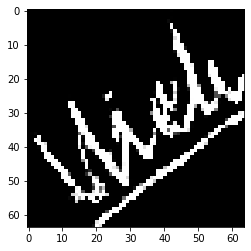

In [ ]:
plt.imshow(np.squeeze(X3[3399]),cmap = 'gray')

In [ ]:
for i in range(1000,1100):
  plt.imshow(X3[i], cmap='gray')
  plt.axis('off')
  plt.show()

##**Saving the Generated Labels**##

In [ ]:
!rm -rf /content/Images/amit
!rm -rf /content/Images/aswal
!rm -rf /content/Images/daniel
!rm -rf /content/Images/john
!rm -rf /content/Images/kevin
!rm -rf /content/Images/lalita
!rm -rf /content/Images/ram
!rm -rf /content/Images/sancho
!rm -rf /content/Images/vinod
!rm -rf /content/Images/vivek


!mkdir -p /content/Images/amit
!mkdir -p /content/Images/aswal
!mkdir -p /content/Images/daniel
!mkdir -p /content/Images/john
!mkdir -p /content/Images/kevin
!mkdir -p /content/Images/lalita
!mkdir -p /content/Images/ram
!mkdir -p /content/Images/sancho
!mkdir -p /content/Images/vinod
!mkdir -p /content/Images/vivek

In [ ]:
labels = ['amit','aswal','daniel','john','kevin','lalita','ram','sancho','vinod','vivek']

for i in range(len(X1_test)):
  f_name = labels[i%10]
  imageio.imsave(os.path.join("/content/Images/"+str(f_name)+"/%d.png" %i),img_as_ubyte(X1_test[i]))
  if i%200 == 0:
    print(i)

0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800


In [ ]:
path = glob.glob(r"/content/Images/amit/*.png")
X_test10 = []
Y_test10 = []
#dim = (64,64) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_test10.append(im_bw)
    Y_test10.append([0])

Y_test10 = np.array(Y_test10)

In [ ]:
for i in range(len(X_test10)):
  plt.imshow(X_test10[i])
  plt.axis('off')
  plt.show()

In [ ]:
%cd /content/
import shutil
shutil.make_archive("Gen_Signatures_3000", 'zip', "/content/Images")

/content


'/content/Gen_Signatures_3000.zip'

##**Import Generator and CGAN model from drive**##

In [ ]:
%cd /content/drive/My Drive/My Segmented Signatures/
!cp /content/Gen_Signatures_3000.zip ./

/content/drive/My Drive/My Segmented Signatures
cp: cannot stat '/content/Gen_Signatures_3000.zip': No such file or directory


In [ ]:
#cgan.generator.save('/content/generator_20000_128x2.h5')
#cgan.cgan_model.save('/content/cgan_20000_128x2.h5')

In [ ]:
%cd /content/drive/My Drive/My Segmented Signatures/Models/
!cp ./generator_20000_128x2.h5 /content/
!cp ./cgan_20000_128x2.h5 /content/
%ls

/content/drive/My Drive/My Segmented Signatures/Models
cgan_20000_128x2.h5         cgan-discriminator.png    generator_20000_128x2.h5
cgan-adversarial_model.png  cgan-generator_model.png


In [ ]:
model_new_generator = keras.models.load_model('/content/generator_20000_128x2.h5')
model_new_cgan = keras.models.load_model('/content/cgan_20000_128x2.h5')

##**Generate Conditional Images**##

In [ ]:
from keras.utils import to_categorical

t_labels = [[0],[1],[2],[3],[4], [5], [6], [7], [8], [9]]

t_labels = to_categorical(t_labels, 10)
#print(t_labels)

batch_size = 10
test1_data = []
t11_labels = []

for _ in range(100):
  noise = cgan.generate_noise("uniform_noise", batch_size)
  gen_images = model_new_generator.predict([noise, t_labels])
  for i in range(len(gen_images)):
    #plt.imshow(np.squeeze(gen_images[i]), cmap = 'gray')
    #plt.axis('off')
    #plt.show()
    test1_data.append(gen_images[i])
    t11_labels.append(t_labels[i])
test1_data = np.array(test1_data)
t11_labels = np.array(t11_labels)
print(test1_data.shape, t11_labels.shape)

(1000, 64, 64, 1) (1000, 10)


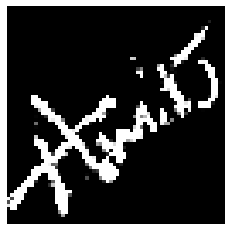

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


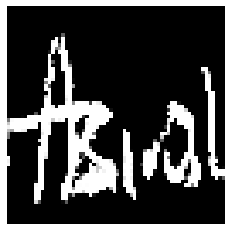

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


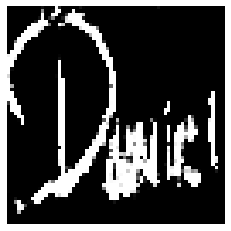

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


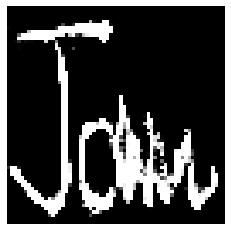

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


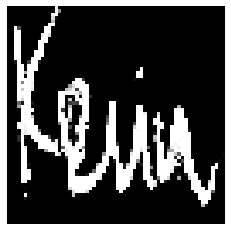

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


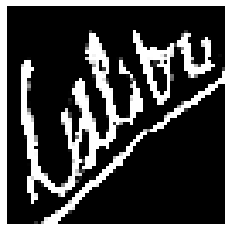

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


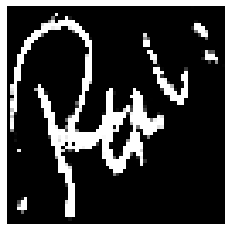

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


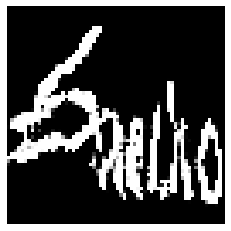

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


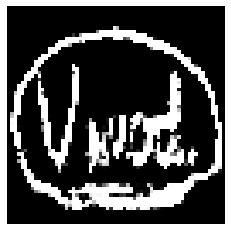

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


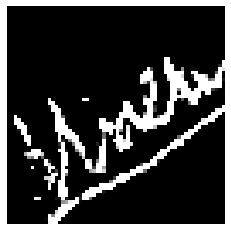

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


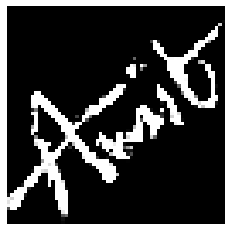

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


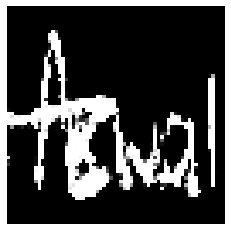

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


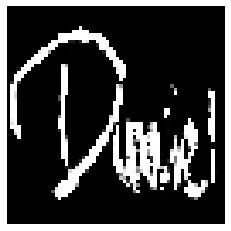

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


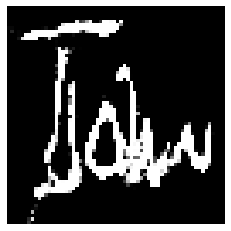

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


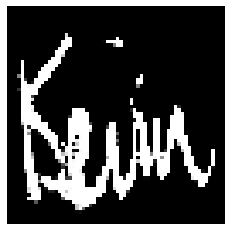

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


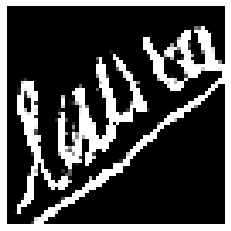

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


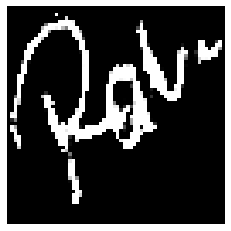

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


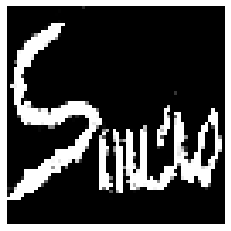

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


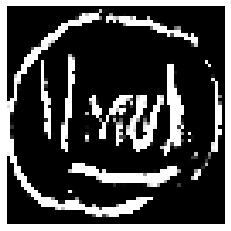

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


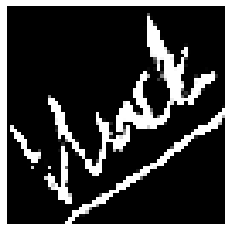

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
for i in range(20):
  plt.imshow(np.squeeze(test1_data[i]), cmap='gray')
  plt.axis('off')
  plt.show()
  print(t11_labels[i])

##**Saved Generated Test Dataset**##

In [ ]:
#Storing the video frames into an array

path = glob.glob(r"/content/drive/My Drive/New_Generated_Signatures/*.png")
count = 0
X1_test = []
for img in path:
    n = cv2.imread(img, 0)
    X1_test.append(n)
    count+=1
    if count%200==0:
      print(count)

X1_test = np.array(X1_test)
X1_test = np.expand_dims(X1_test, -1)
print(X1_test.shape)

In [ ]:
Y1_test = []
for i in range(len(X1_test)):
  Y1_test.append([i%10])
Y1_test = np.array(Y1_test)
print(Y1_test.shape)

(3000, 1)


In [ ]:
from sklearn.utils import shuffle

for i in range(100):
  X2_test, Y2_test = shuffle(X1_test, Y1_test, random_state = 0)

In [ ]:
for i in range(20):
  plt.imshow(np.squeeze(X2_test[i]), cmap='gray')
  plt.axis('off')
  plt.show()
  print("Ground Truth:", Y2_test[i])

##**Prepare Data for Training Multi-Label Classifier**##

In [ ]:
x_train, y_train = np.expand_dims(X_train, axis = 3), Y_train
x_test, y_test = test1_data, t11_labels

In [ ]:
y_test = to_categorical(y_test, 10)

In [ ]:
c = Y_train

y1_train = []
for i in range(len(c)):
  y1_train.append(list(c[i]))
  y1_train[i].append(10)
print(y1_train[::50])

[[0, 10], [0, 10], [1, 10], [1, 10], [2, 10], [2, 10], [3, 10], [3, 10], [4, 10], [4, 10], [5, 10], [5, 10], [6, 10], [6, 10], [7, 10], [7, 10], [8, 10], [8, 10], [9, 10], [9, 10]]


In [ ]:
y1_test = []
for i in range(len(x_test)):
  y1_test.append([i%10])
y1_test = np.array(y1_test)
print(y1_test.shape)

(1000, 1)


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y1_train = mlb.fit_transform(y1_train)
y1_test = to_categorical(y1_test, 11)

print(mlb.classes_)
y1_test = np.asarray(y1_test).astype('float32')

[0 1 2 3 4 5 6 7 8 9 10]


In [ ]:
X_train_P1 = []
X_train_P2 = []
X_val = []

Y_train_P1 = []
Y_train_P2 = []
Y_val = []

c = 0
for i in range(len(x_train)):
  if c<40:
    X_train_P1.append(x_train[i])
    Y_train_P1.append(y1_train[i])
  elif c<50:
    X_val.append(x_train[i])
    Y_val.append(y1_train[i])
  elif c<100:
    X_train_P2.append(x_train[i])
    Y_train_P2.append(y1_train[i])

  if c==99:
    c = 0
  c+=1

X_train_P1 = np.array(X_train_P1)
X_train_P2 = np.array(X_train_P2)
X_val = np.array(X_val)

Y_train_P1 = np.array(Y_train_P1)
Y_train_P2 = np.array(Y_train_P2)
Y_val = np.array(Y_val)


print(X_train_P1.shape, Y_train_P1.shape)
print(X_train_P2.shape, Y_train_P2.shape)
print(X_val.shape, Y_val.shape)

XS_train = np.concatenate([X_train_P1, x_test[:400]])
YS_train = np.concatenate([Y_train_P1, y1_test[:400]])
XS_val = np.concatenate([X_val, x_test[400:500]])
YS_val = np.concatenate([Y_val, y1_test[400:500]])
XS_test = np.concatenate([X_train_P2, x_test[500:]])
YS_test = np.concatenate([Y_train_P2, y1_test[500:]])

print('Training Set:', XS_train.shape, YS_train.shape)
print('Validation Set:', XS_val.shape, YS_val.shape)
print('Testing Set:', XS_test.shape, YS_test.shape)

(400, 64, 64, 1) (400, 11)
(500, 64, 64, 1) (500, 11)
(100, 64, 64, 1) (100, 11)
Training Set: (800, 64, 64, 1) (800, 11)
Validation Set: (200, 64, 64, 1) (200, 11)
Testing Set: (1000, 64, 64, 1) (1000, 11)


In [ ]:
from sklearn.utils import shuffle

for i in range(1000):
  XF_train, YF_train = shuffle(XS_train, YS_train, random_state=0)
  XF_val, YF_val = shuffle(XS_val, YS_val, random_state=0)
  XF_test, YF_test = shuffle(XS_test, YS_test, random_state=0)

In [ ]:
model2 = Sequential()
model2.add(Dense(32, input_shape=((64,64,1))))
model2.add(LeakyReLU(alpha=0.2))
model2.add(Dropout(0.6))

model2.add(Dense(64))
model2.add(BatchNormalization(momentum=0.8))
model2.add(LeakyReLU(alpha=0.2))
model2.add(Dropout(0.6))

model2.add(Flatten())

model2.add(Dense(512))
model2.add(LeakyReLU(alpha=0.2))

model2.add(Dropout(0.6))

model2.add(Dense(11, activation='sigmoid'))

model2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 64, 64, 32)        64        
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
dense_36 (Dense)             (None, 64, 64, 64)        2112      
_________________________________________________________________
batch_normalization_28 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 64, 64, 64)      

In [ ]:
model2 = Sequential()
model2.add(Conv2D(64, kernel_size=3, strides=2, padding='same', input_shape=((64, 64, 1))))
model2.add(LeakyReLU(alpha=0.2))
model2.add(Dropout(0.6))

model2.add(Conv2D(128, kernel_size=3, strides=2, padding='same'))
model2.add(BatchNormalization(momentum=0.8))
model2.add(LeakyReLU(alpha=0.2))
model2.add(Dropout(0.6))

model2.add(Conv2D(256, kernel_size=3, strides=2, padding='same'))
model2.add(BatchNormalization(momentum=0.8))
model2.add(LeakyReLU(alpha=0.2))
model2.add(Dropout(0.6))

model2.add(Flatten())

model2.add(Dense(512))
model2.add(LeakyReLU(alpha=0.2))
model2.add(Dropout(0.6))

model2.add(Dense(11, activation='sigmoid'))

model2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 32, 32, 64)        640       
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_31 (Batc (None, 16, 16, 128)       512       
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 16, 16, 128)     

In [ ]:
optimizer = Adam(lr=0.0002)
model2.compile(loss = 'binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
history2 = model2.fit(XF_train, YF_train, batch_size = 100, epochs=200, validation_data = (XF_val, YF_val), shuffle = True, verbose = 1)

Epoch 1/200
8/8 [==============================] - 0s 47ms/step - loss: 0.5867 - accuracy: 0.0463 - val_loss: 0.2725 - val_accuracy: 0.0500
Epoch 2/200
8/8 [==============================] - 0s 23ms/step - loss: 0.3788 - accuracy: 0.0575 - val_loss: 0.2786 - val_accuracy: 0.0500
Epoch 3/200
8/8 [==============================] - 0s 22ms/step - loss: 0.3088 - accuracy: 0.0450 - val_loss: 0.2483 - val_accuracy: 0.0500
Epoch 4/200
8/8 [==============================] - 0s 22ms/step - loss: 0.2731 - accuracy: 0.0375 - val_loss: 0.2293 - val_accuracy: 0.0500
Epoch 5/200
8/8 [==============================] - 0s 22ms/step - loss: 0.2523 - accuracy: 0.0500 - val_loss: 0.2241 - val_accuracy: 0.0750
Epoch 6/200
8/8 [==============================] - 0s 22ms/step - loss: 0.2277 - accuracy: 0.0737 - val_loss: 0.2113 - val_accuracy: 0.0850
Epoch 7/200
8/8 [==============================] - 0s 21ms/step - loss: 0.2146 - accuracy: 0.0712 - val_loss: 0.2006 - val_accuracy: 0.1000
Epoch 8/200
8/8 [===

In [ ]:
history2 = model2.fit(XF_train, YF_train, batch_size = 100, epochs=200, validation_data = (XF_test, YF_test), shuffle = True, verbose = 1)

In [ ]:
model2.fit(XF_train, YF_train, batch_size = 100, epochs=10, validation_data = (XF_val, YF_val), shuffle = True, verbose = 1)

Epoch 1/10
8/8 [==============================] - 0s 34ms/step - loss: 0.0052 - accuracy: 0.6637 - val_loss: 0.0087 - val_accuracy: 0.8750
Epoch 2/10
8/8 [==============================] - 0s 22ms/step - loss: 0.0043 - accuracy: 0.6938 - val_loss: 0.0089 - val_accuracy: 0.8850
Epoch 3/10
8/8 [==============================] - 0s 21ms/step - loss: 0.0039 - accuracy: 0.6538 - val_loss: 0.0079 - val_accuracy: 0.8900
Epoch 4/10
8/8 [==============================] - 0s 22ms/step - loss: 0.0044 - accuracy: 0.6925 - val_loss: 0.0065 - val_accuracy: 0.9050
Epoch 5/10
8/8 [==============================] - 0s 22ms/step - loss: 0.0035 - accuracy: 0.6963 - val_loss: 0.0059 - val_accuracy: 0.8850
Epoch 6/10
8/8 [==============================] - 0s 21ms/step - loss: 0.0048 - accuracy: 0.6550 - val_loss: 0.0072 - val_accuracy: 0.8750
Epoch 7/10
8/8 [==============================] - 0s 22ms/step - loss: 0.0057 - accuracy: 0.6575 - val_loss: 0.0072 - val_accuracy: 0.8500
Epoch 8/10
8/8 [===========

##**Training Results**##

<Figure size 432x288 with 0 Axes>

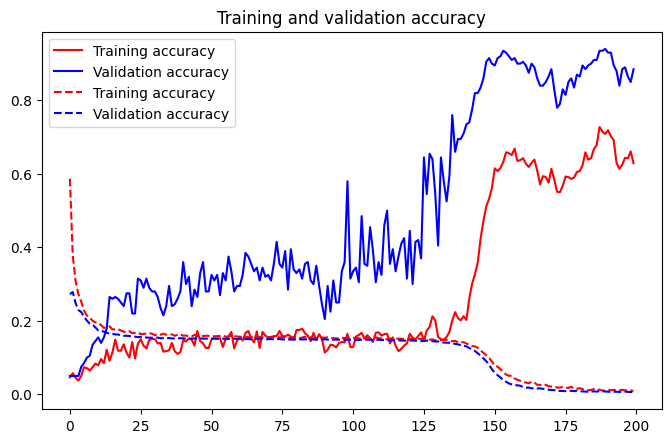

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(8,5), dpi=100)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.plot(epochs, loss, 'r', linestyle='dashed', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', linestyle='dashed', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

In [ ]:
for i in range(20):
  plt.imshow(np.squeeze(XF_test[i]), cmap='gray')
  plt.axis('off')
  plt.show()
  print(YF_test[i])

In [ ]:
model2.predict(XF_test[0:2])

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [9.9834085e-01, 1.2080270e-02, 1.4199453e-03, 1.4253678e-03,
        2.2534153e-03, 2.0786193e-03, 7.5387955e-03, 3.6766063e-03,
        1.7614814e-03, 1.2913409e-02, 3.2239992e-04]], dtype=float32)

In [ ]:
class1 = model2.predict(XF_test)

Labels = ['Amit','Aswal','Daniel','John','Kevin','Lalita','Ram','Sancho','Vinod','Vivek']
for i in range(20):
  real = 0
  index_sign = np.argmax(class1[i][:10])
  
  index = class1[i][10]
  if index > 0.5:
    real = 1
  print('Signature',i,'=',Labels[index_sign], "; Genuiness:", real)
  print(YF_test[i])

##**Training and Testing Accuracy**##

In [ ]:
class1 = model2.predict(XF_train)

c1, w1 = 0, 0
c2, w2 = 0, 0

Labels = ['Amit','Aswal','Daniel','John','Kevin','Lalita','Ram','Sancho','Vinod','Vivek']
for i in range(len(class1)):
  real = 0
  index_sign = np.argmax(class1[i][:10])
  GT_sign = np.argmax(YF_train[i][:10])
  
  index = class1[i][10]
  if index > 0.5:
    real = 1
  #print('Signature',i,'=',Labels[index_sign], "; Genuiness:", real)
  if int(real) == int(YF_train[i][10]):
    c1+=1
  else:
    w1+=1
  
  if int(index_sign) == int(GT_sign):
    c2+=1
  else:
    w2+=1

print("Genuine Accuracy:", c1/(c1+w1)*100)
print("Correct:", c1, "Wrong:", w1)

print("Signature Accuracy:", c2/(c2+w2)*100)
print("Correct:", c2, "Wrong:", w2)

Genuine Accuracy: 100.0
Correct: 800 Wrong: 0
Signature Accuracy: 100.0
Correct: 800 Wrong: 0


In [ ]:
class1 = model2.predict(XF_test)

c1, w1 = 0, 0
c2, w2 = 0, 0

Labels = ['Amit','Aswal','Daniel','John','Kevin','Lalita','Ram','Sancho','Vinod','Vivek']
for i in range(len(class1)):
  real = 0
  index_sign = np.argmax(class1[i][:10])
  GT_sign = np.argmax(YF_test[i][:10])
  
  index = class1[i][10]
  if index > 0.5:
    real = 1
  #print('Signature',i,'=',Labels[index_sign], "; Genuiness:", real)
  if int(real) == int(YF_test[i][10]):
    c1+=1
  else:
    w1+=1
  
  if int(index_sign) == int(GT_sign):
    c2+=1
  else:
    w2+=1

print("Genuine Accuracy:", c1/(c1+w1)*100)
print("Correct:", c1, "Wrong:", w1)

print("Signature Accuracy:", c2/(c2+w2)*100)
print("Correct:", c2, "Wrong:", w2)

Genuine Accuracy: 100.0
Correct: 1000 Wrong: 0
Signature Accuracy: 99.8
Correct: 998 Wrong: 2


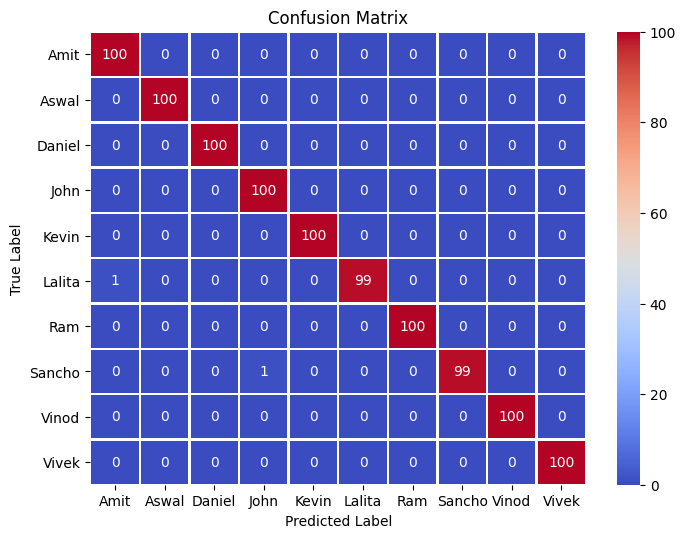

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       100
           3       0.99      1.00      1.00       100
           4       1.00      1.00      1.00       100
           5       1.00      0.99      0.99       100
           6       1.00      1.00      1.00       100
           7       1.00      0.99      0.99       100
           8       1.00      1.00      1.00       100
           9       1.00      1.00      1.00       100

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
Labels = ['Amit','Aswal','Daniel','John','Kevin','Lalita','Ram','Sancho','Vinod','Vivek']

def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(8, 6), dpi=100)
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=Labels,
                yticklabels=Labels,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_test = model2.predict(XF_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test[:, :10], axis=1)
max_y_test = np.argmax(YF_test[:, :10], axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print(metrics.classification_report(max_y_test, max_y_pred_test))

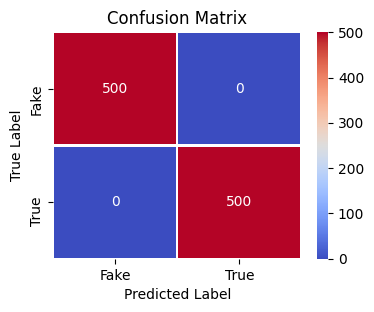

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       500
         1.0       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
Labels = ['Fake', 'True']

def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(4, 3), dpi=100)
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=Labels,
                yticklabels=Labels,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_test = model2.predict(XF_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.round(y_pred_test[:, 10])
max_y_test = np.round(YF_test[:, 10])

show_confusion_matrix(max_y_test, max_y_pred_test)

print(metrics.classification_report(max_y_test, max_y_pred_test))

##**Validation Accuracy**##

In [ ]:
class1 = model2.predict(XF_val)

c1, w1 = 0, 0
c2, w2 = 0, 0

Labels = ['Amit','Aswal','Daniel','John','Kevin','Lalita','Ram','Sancho','Vinod','Vivek']
for i in range(len(class1)):
  real = 0
  index_sign = np.argmax(class1[i][:10])
  GT_sign = np.argmax(YF_val[i][:10])
  
  index = class1[i][10]
  if index > 0.5:
    real = 1
  #print('Signature',i,'=',Labels[index_sign], "; Genuiness:", real)
  if int(real) == int(YF_val[i][10]):
    c1+=1
  else:
    w1+=1
  
  if int(index_sign) == int(GT_sign):
    c2+=1
  else:
    w2+=1

print("Genuine Accuracy:", c1/(c1+w1)*100)
print("Correct:", c1, "Wrong:", w1)

print("Signature Accuracy:", c2/(c2+w2)*100)
print("Correct:", c2, "Wrong:", w2)

Genuine Accuracy: 100.0
Correct: 200 Wrong: 0
Signature Accuracy: 99.5
Correct: 199 Wrong: 1


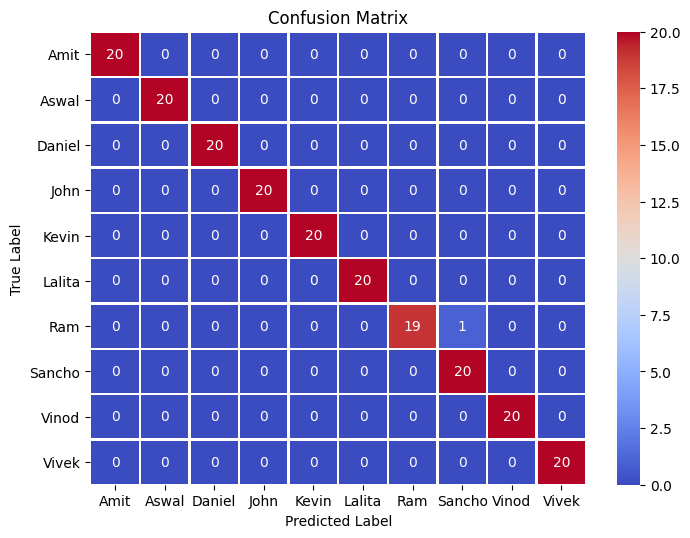

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      0.95      0.97        20
           7       0.95      1.00      0.98        20
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [ ]:
Labels = ['Amit','Aswal','Daniel','John','Kevin','Lalita','Ram','Sancho','Vinod','Vivek']

def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(8, 6), dpi=100)
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=Labels,
                yticklabels=Labels,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_test = model2.predict(XF_val)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test[:, :10], axis=1)
max_y_test = np.argmax(YF_val[:, :10], axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print(metrics.classification_report(max_y_test, max_y_pred_test))

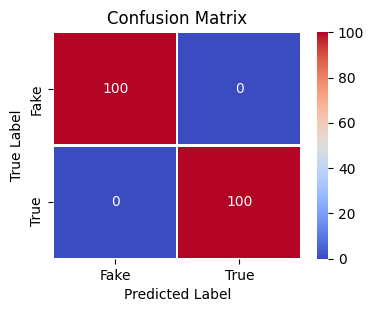

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       100
         1.0       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
Labels = ['Fake', 'True']

def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(4, 3), dpi=100)
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=Labels,
                yticklabels=Labels,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_test = model2.predict(XF_val)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.round(y_pred_test[:, 10])
max_y_test = np.round(YF_val[:, 10])

show_confusion_matrix(max_y_test, max_y_pred_test)

print(metrics.classification_report(max_y_test, max_y_pred_test))

##**Adversarial Noise**##

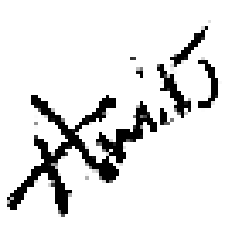

In [ ]:
plt.imshow(np.squeeze(test1_data[0]), cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
print(np.squeeze(test1_data[0]))

[[1.40760624e-11 8.39153691e-23 5.74248298e-20 ... 7.42665131e-12
  4.21025675e-07 4.47489583e-05]
 [3.18902425e-20 2.72788910e-31 5.82076849e-38 ... 4.57825899e-18
  6.64625147e-14 3.76495482e-05]
 [1.10421200e-16 2.78622237e-34 1.76582687e-37 ... 8.87671504e-19
  1.13831710e-15 1.90036788e-12]
 ...
 [8.75050828e-05 1.08230302e-09 1.44012403e-18 ... 0.00000000e+00
  1.21818179e-33 7.60543589e-20]
 [1.28583741e-10 2.60143857e-18 1.31585454e-23 ... 0.00000000e+00
  4.41137536e-33 1.20948015e-20]
 [9.97635561e-06 7.53755511e-14 3.46548848e-18 ... 2.50809982e-22
  1.07079570e-21 5.23762128e-17]]


In [ ]:
image = Image.fromarray(np.squeeze(test1_data[0]))

In [ ]:
image1 = test1_data[0]

In [ ]:
image_round = np.round(image1)

In [ ]:
print(image_round)

[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


In [ ]:
imageio.imsave(os.path.join("/content/amit.png"),img_as_ubyte(image1))

In [ ]:
amit = cv2.imread('/content/amit.png', 0)
amit = np.expand_dims(amit, axis = 2)

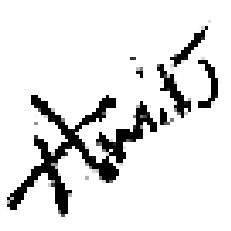

In [ ]:
plt.imshow(np.squeeze(amit), cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
print(amit)

[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]


In [ ]:
a_noise = np.subtract(np.squeeze(image1), np.squeeze(amit))

In [ ]:
print(a_noise)

[[1.40760624e-11 8.39153691e-23 5.74248298e-20 ... 7.42665131e-12
  4.21025675e-07 4.47489583e-05]
 [3.18902425e-20 2.72788910e-31 5.82076849e-38 ... 4.57825899e-18
  6.64625147e-14 3.76495482e-05]
 [1.10421200e-16 2.78622237e-34 1.76582687e-37 ... 8.87671504e-19
  1.13831710e-15 1.90036788e-12]
 ...
 [8.75050828e-05 1.08230302e-09 1.44012403e-18 ... 0.00000000e+00
  1.21818179e-33 7.60543589e-20]
 [1.28583741e-10 2.60143857e-18 1.31585454e-23 ... 0.00000000e+00
  4.41137536e-33 1.20948015e-20]
 [9.97635561e-06 7.53755511e-14 3.46548848e-18 ... 2.50809982e-22
  1.07079570e-21 5.23762128e-17]]


In [ ]:
print(a_noise.shape)
print(np.max(a_noise*255))
print(np.max(image1*255))

(64, 64)
0.4523505
255.0


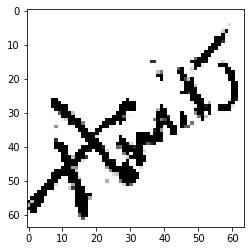

In [ ]:
plt.imshow(a_noise, cmap='gray')

In [ ]:
def softmax(x):
  e_x = np.exp(x)
  return e_x/sum(e_x)

In [ ]:
i = 0
class1 = model2.predict(np.expand_dims(image1, axis=0))

Labels = ['Amit','Aswal','Daniel','John','Kevin','Lalita','Ram','Sancho','Vinod','Vivek']
real = 0
index_soft = softmax(class1[i][:10])
index_sign = np.argmax(class1[i][:10])
  
index = class1[i][10]
if index > 0.5:
  real = 1
print('Signature',i,'=',Labels[index_sign], "; Genuiness:", real)
print("Softmax Probabilities:", index_soft)
print("Real Probability:", index)

Signature 0 = Amit ; Genuiness: 0
Softmax Probabilities: [0.23132868 0.08534999 0.08526855 0.08532372 0.08529861 0.08548891
 0.08536716 0.08546957 0.08528539 0.08581939]
Real Probability: 8.402544e-05


In [ ]:
i = 0
class1 = model2.predict(np.expand_dims(amit, axis=0))

Labels = ['Amit','Aswal','Daniel','John','Kevin','Lalita','Ram','Sancho','Vinod','Vivek']
real = 0
index_soft = softmax(class1[i][:10])
index_sign = np.argmax(class1[i][:10])
  
index = class1[i][10]
if index > 0.5:
  real = 1
print('Signature',i,'=',Labels[index_sign], "; Genuiness:", real)
print("Softmax Probabilities:", index_soft)
print("Real Probability:", index)

Signature 0 = Amit ; Genuiness: 1
Softmax Probabilities: [0.23196931 0.08533674 0.08533674 0.08533674 0.08533674 0.08533674
 0.08533674 0.08533674 0.08533674 0.08533674]
Real Probability: 0.99999535


In [ ]:
image2 = np.expand_dims(X_train[99], axis=(0,3))
print(image2.shape)

(1, 64, 64, 1)


In [ ]:
i = 0
class1 = model2.predict(image2)

Labels = ['Amit','Aswal','Daniel','John','Kevin','Lalita','Ram','Sancho','Vinod','Vivek']
real = 0

index_soft = softmax(class1[i][:10])
index_sign = np.argmax(class1[i][:10])
  
index = class1[i][10]
if index > 0.5:
  real = 1
print('Signature',i,'=',Labels[index_sign], "; Genuiness:", real)
print("Softmax Probabilities:", index_soft)
print("Real Probability:", index)

Signature 0 = Amit ; Genuiness: 1
Softmax Probabilities: [0.23196931 0.08533674 0.08533674 0.08533674 0.08533674 0.08533674
 0.08533675 0.08533674 0.08533674 0.08533674]
Real Probability: 1.0


In [ ]:
vivek = np.add(np.squeeze(image2), a_noise)
vivek = np.expand_dims(vivek, axis=(0,3))
print(vivek.shape)

amit_noise = np.add(np.squeeze(image1), a_noise)
amit_noise = np.expand_dims(amit_noise, axis=(0,3))
print(amit_noise.shape)

(1, 64, 64, 1)
(1, 64, 64, 1)


In [ ]:
i = 0
class1 = model2.predict(amit_noise)

Labels = ['Amit','Aswal','Daniel','John','Kevin','Lalita','Ram','Sancho','Vinod','Vivek']
real = 0
index_soft = softmax(class1[i][:10])
index_sign = np.argmax(class1[i][:10])
  
index = class1[i][10]
if index > 0.5:
  real = 1
print('Signature',i,'=',Labels[index_sign], "; Genuiness:", real)
print("Softmax Probabilities:", index_soft)
print("Real Probability:", index)

Signature 0 = Daniel ; Genuiness: 0
Softmax Probabilities: [0.07442373 0.07442373 0.20230466 0.07442373 0.07442373 0.07442373
 0.20230466 0.07442373 0.07442462 0.07442373]
Real Probability: 0.0


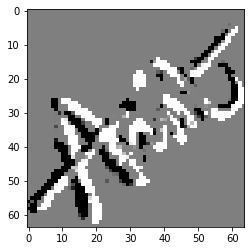

In [ ]:
plt.imshow(np.squeeze(vivek), cmap='gray')

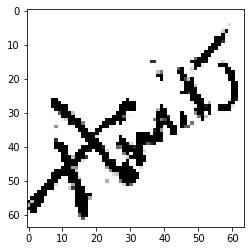

In [ ]:
plt.imshow(np.squeeze(amit_noise), cmap='gray')